In [2]:
# ONLY FOR COLAB!
#import os
#from google.colab import drive, files
#if not os.path.exists('/content/drive'):
#  drive.mount('/content/drive')

In [3]:
#DATA_DIR = './data_colab/yolo-food/'
#if not os.path.exists(DATA_DIR):
#  #files.upload()
#  !unzip /content/drive/MyDrive/Be.ai/yolo-food.zip # to /content/data

In [13]:
#FOR LOCAL
# fix path to dataset at "/Users/evakhromeeva/Library/Application Support/Ultralytics/settings.yaml"
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
DATA_DIR = './yolo-food/'

In [5]:
!pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 15.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 14.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.2 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

Matplotlib is building the font cache; this may take a moment.


In [8]:
HOME = os.getcwd()
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='yolo-food/images/train/951896_0b2e4483-7925-4b5f-a1b1-c97b3e575f2a.jpg' save=True

/Users/evakhromeeva/Projects/BeYOLOSegmentation
/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

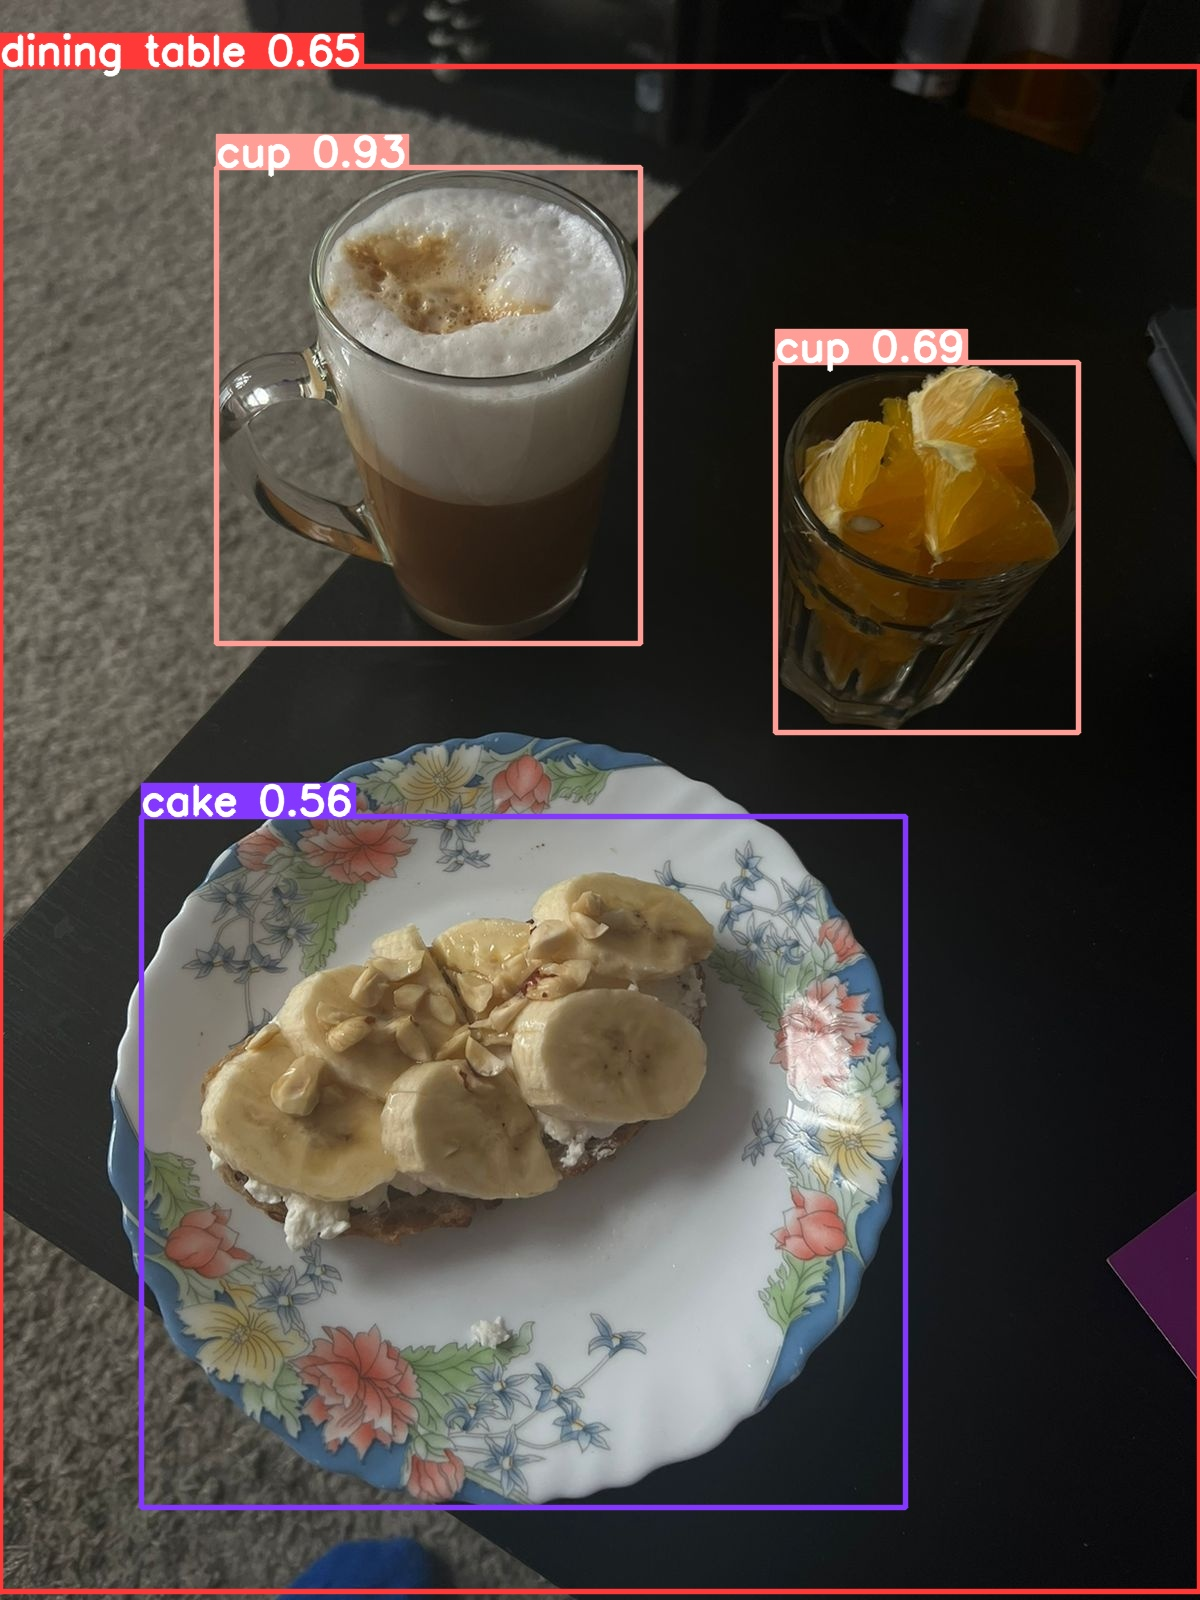

In [9]:
Image(filename='runs/detect/predict/951896_0b2e4483-7925-4b5f-a1b1-c97b3e575f2a.jpg', height=600)

In [10]:
!yolo task=segment mode=predict model=yolov8n-seg.pt conf=0.25 source='yolo-food/images/train/951896_0c8e78d0-bc83-4c17-b4a9-5c3787ed56d9.jpg' save=True

100%|██████████████████████████████████████| 6.73M/6.73M [00:00<00:00, 10.8MB/s]
/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for

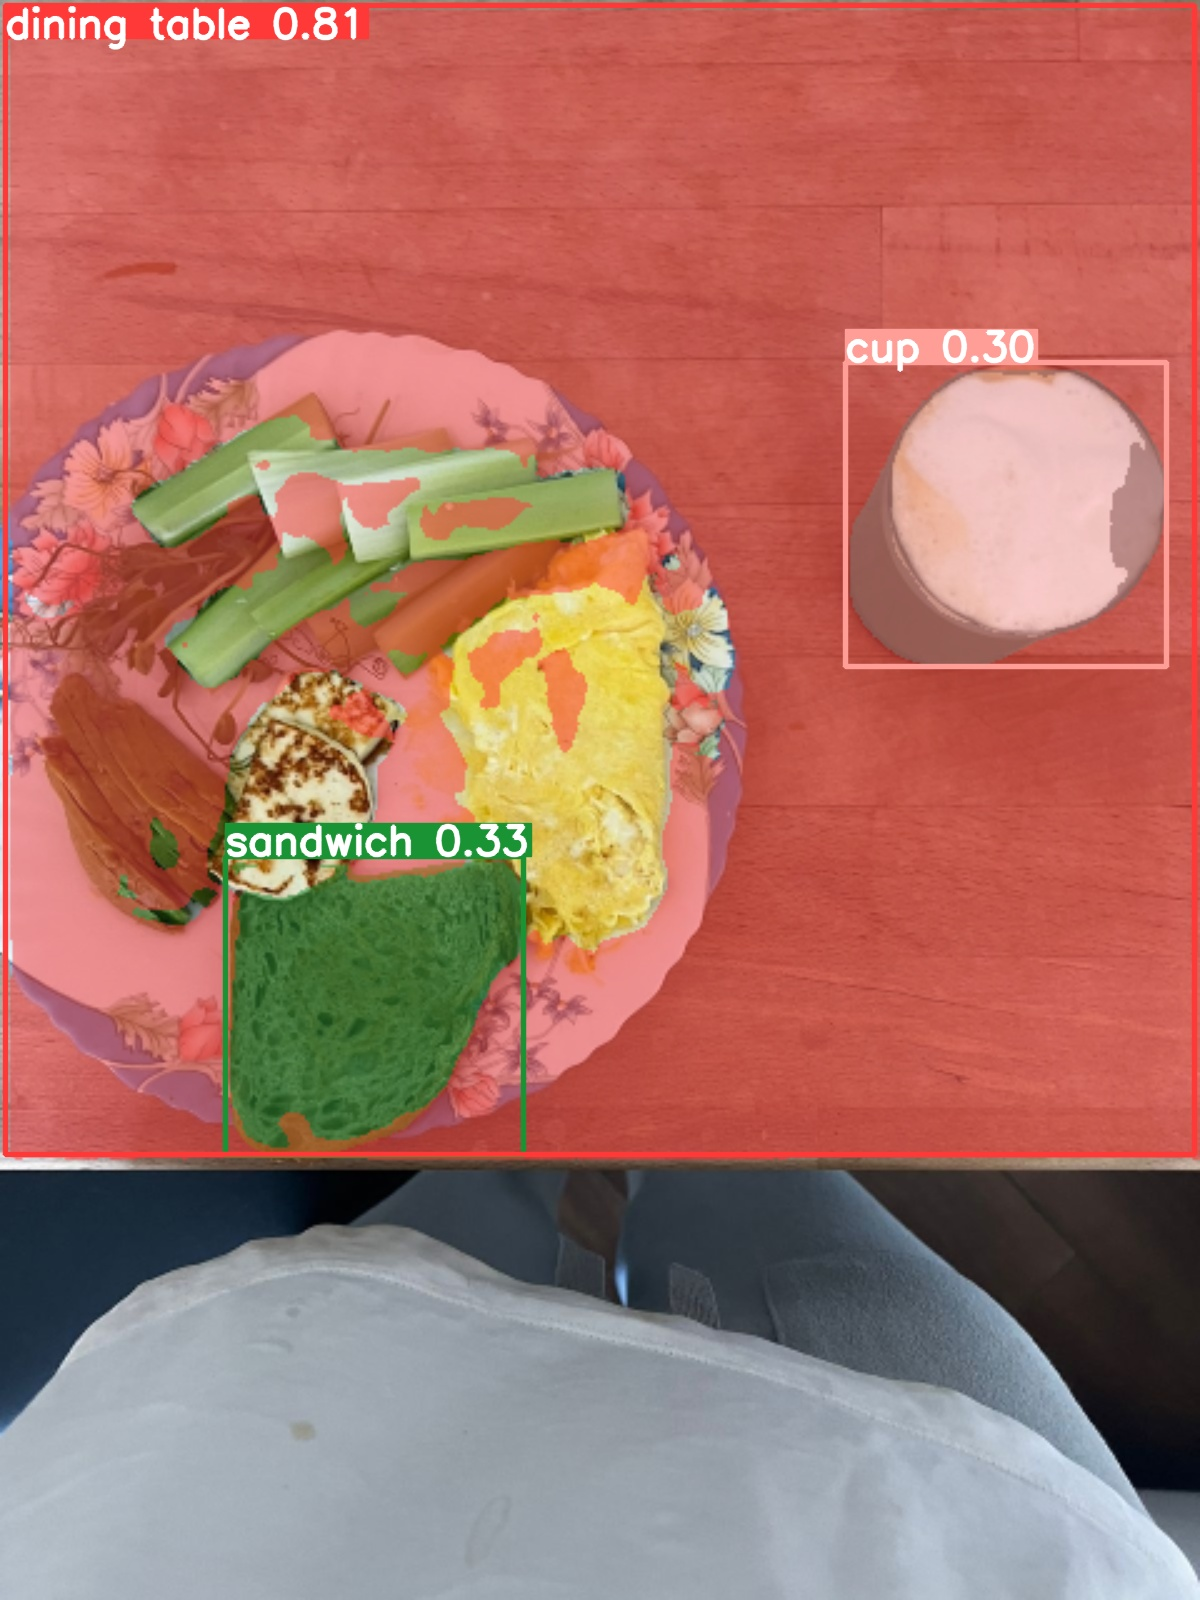

In [11]:
Image(filename='runs/segment/predict/951896_0c8e78d0-bc83-4c17-b4a9-5c3787ed56d9.jpg', height=600)

In [14]:
!yolo segment train data=yolo-food/data_config.yaml model=yolov8n-seg.pt epochs=100 imgsz=640

/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_l

In [ ]:
!tensorboard --logdir runs/segment/train # view at http://localhost:6006/

In [15]:
!yolo task=segment mode=predict model=runs/segment/train2/weights/best.pt conf=0.25 source='yolo-food/images/train/951896_0c8e78d0-bc83-4c17-b4a9-5c3787ed56d9.jpg' save=True

/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_l

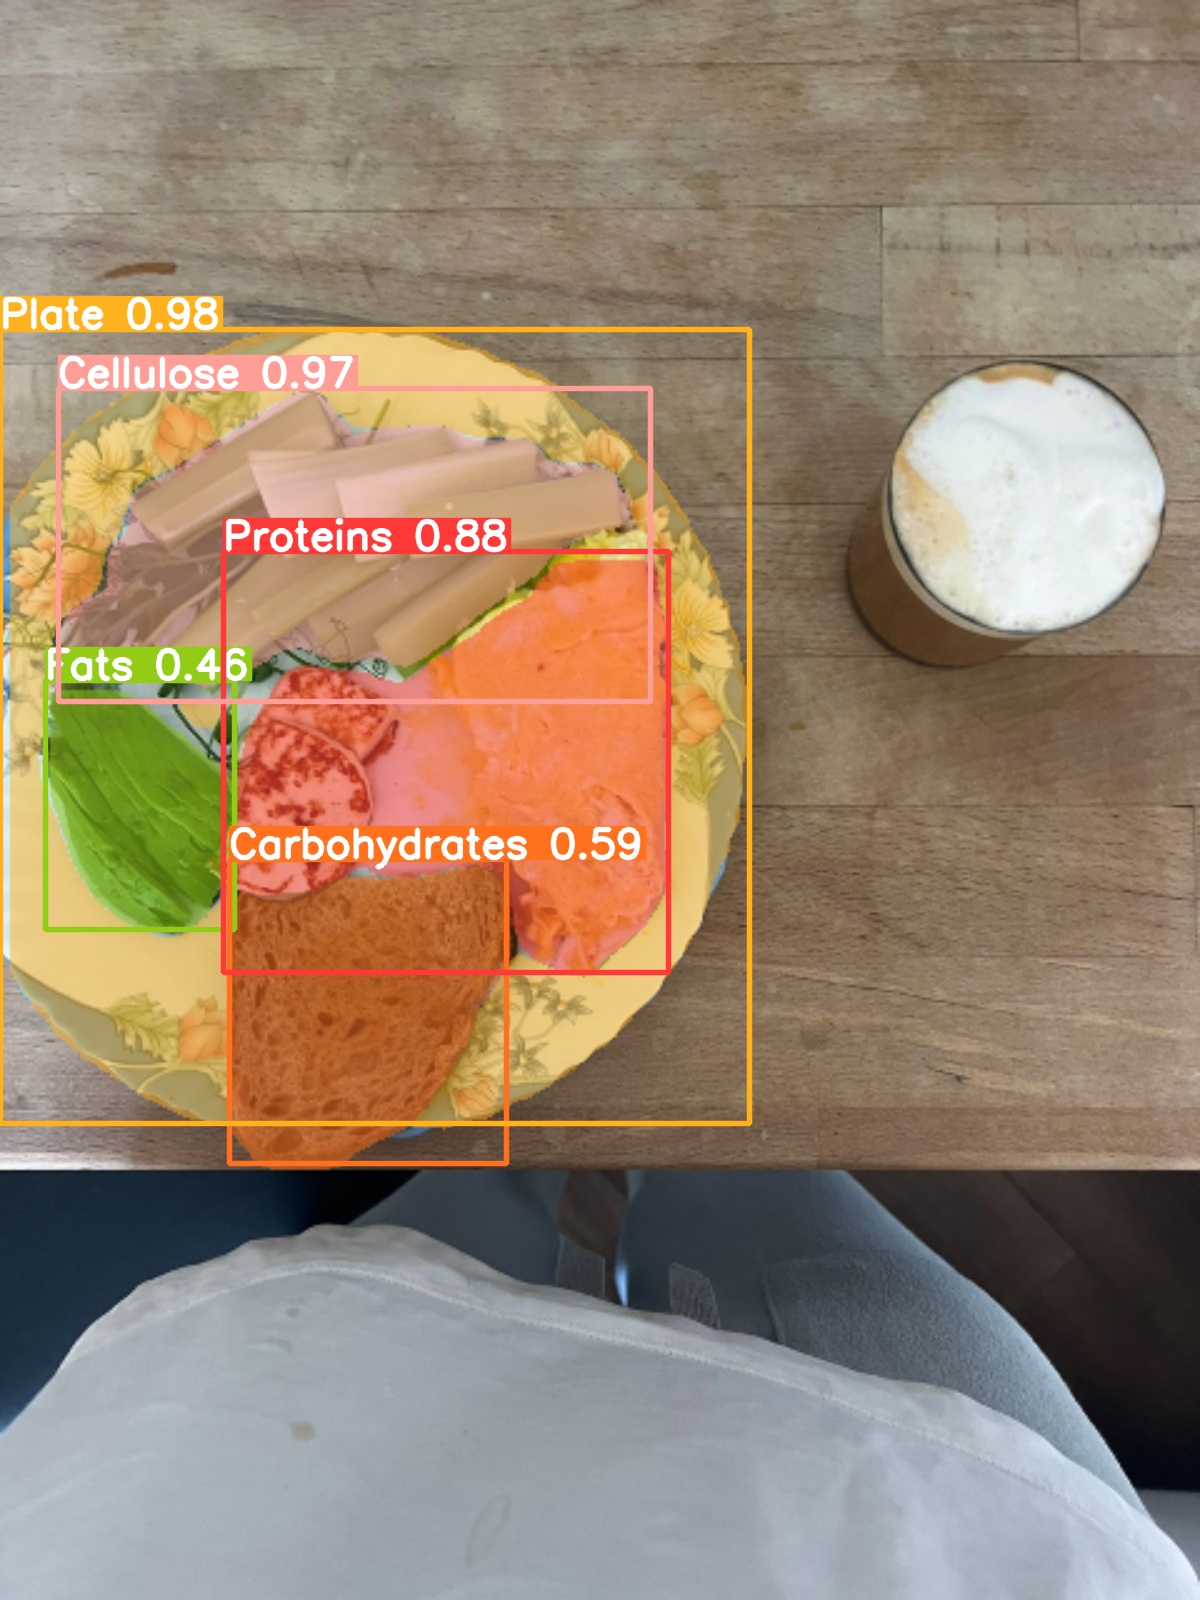

In [16]:
Image(filename='runs/segment/predict2/951896_0c8e78d0-bc83-4c17-b4a9-5c3787ed56d9.jpg', height=600)